## Time Series Analysis: Home Assignment 1

due to **11.02.21 23:00**

You need to upload HA1 to github repository,  the link will be provided later.

Enter your name below: 

In [2]:
name='Polina Shishkina' 

### Contents

1. **Data preparation (7 points)**

    $1.0$ Download data and import functions
    
    $1.1$ Read data (1 pt.)
    
    $1.2$ Check NAs (1 pt.)
    
    $1.3$ Transform dates (2 pt.)
    
    $1.4$. Make some plots (0.75 pt.)
    
    $1.5$ Split the data (0.75 pt.)
    
 
2. **ETS (7 points)**

    $2.1$ Estimate ETS (1 pt.)
    
    $2.2$ Point forecasts (1 pt.)
    
    $2.3$ Interval forecasts 1 (1 pt.)
    
    $2.4$ Interval forecasts 2 (1 pt.)
    
    $2.5$ Forecast quality metrics (2 pt.)
    
    $2.6$ Model comparison (1 pt.)
    

## 1. Data preparation (7 pt.)

### 1.0 Download data and import functions
[back to contents](#Contents)

You have to download [BI_TSA_HA_1_data.csv](https://github.com/bdemeshev/ts603/blob/master/2021-spring/BI_TSA_HA_1_data.csv), which represents quarterly sales of Walmart from 1984 to 2020. The sourse of the data is [ycharts.com](https://ycharts.com/companies/WMT/revenues). 

In [1]:
import pandas as pd
import numpy as np
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import  mean_absolute_error, mean_squared_error

### 1.1 Read data (1 pt.)
[back to contents](#Contents)

Read the downloaded data from your local computer and name it ``` df ```

Alternatively, you can skip 1.0 and access data directly putting ```'https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv'``` inside ```read_csv```

use ``` pd.read_csv('... .csv') ```

In [2]:
#code here (1 pt.)
df=pd.read_csv('https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv')

### 1.2 Check NAs (1 pt.)
[back to contents](#Contents)

Check whether ``` df ``` contains missing values(NAs):

apply ``` isna().value_counts() ``` to ``` df ```

In [3]:
print(df.isna().value_counts())

sales  month  day    year 
False  False  False  False    147
dtype: int64


How many missing values are there in ``` df ```?

In [208]:
print(0)

0


### 1.3 Dates transformation (2 pt.)
[back to contents](#Contents)

How are dates represented in the original dataset? 

In [4]:
print(df.dtypes)

sales    float64
month      int64
day        int64
year       int64
dtype: object


Transform dates to datetime format:

``` df['date']=df['...']*10000+df['...']*100+df['...']*1 ```

``` df['date']=pd.to_datetime(df['date'], format='%Y%m%d') ```

change each ``` df['...'] ``` to one of ``` df['month'] ```, ``` df['year'] ```, ``` df['day'] ```according to ``` format='%Y%m%d'```

In [5]:
df['date']=df['year']*10000+df['month']*100+df['day']*1
df['date']=pd.to_datetime(df['date'], format='%Y%m%d')
print(df)

       sales  month  day  year       date
0    134.710     10   31  2020 2020-10-31
1    137.740      7   31  2020 2020-07-31
2    134.620      4   30  2020 2020-04-30
3    141.670      1   31  2020 2020-01-31
4    127.990     10   31  2019 2019-10-31
..       ...    ...  ...   ...        ...
142    1.656      4   30  1985 1985-04-30
143    2.074      1   31  1985 1985-01-31
144    1.584     10   31  1984 1984-10-31
145    1.508      7   31  1984 1984-07-31
146    1.235      4   30  1984 1984-04-30

[147 rows x 5 columns]


Change index to dates:

``` df.index=.... ```

In [6]:
df.index=pd.to_datetime(df['date'])

What is the size of the dataset?

use ```.shape```

In [7]:
df.shape

(147, 5)

Drop columns ['day', 'year','month','date']:

```df=df.drop(..., axis=1)```

In [8]:
df=df.drop(['day', 'year','month','date'], axis=1)

What is the size of the dataset now?

In [9]:
df.shape
print(df)

              sales
date               
2020-10-31  134.710
2020-07-31  137.740
2020-04-30  134.620
2020-01-31  141.670
2019-10-31  127.990
...             ...
1985-04-30    1.656
1985-01-31    2.074
1984-10-31    1.584
1984-07-31    1.508
1984-04-30    1.235

[147 rows x 1 columns]


### 1.4 Plot data (0.75 pt.)
[back to contents](#Contents)

transform data frame column to series:

```y=df['date']```

In [10]:
y=df['sales']

```plot_series``` gets a series as an argument, whose dates sorted in ascending order.
Transform your time series by changing descending order to ascending order:

apply ```np.flip``` to ```y``` and name the result ```y```

In [11]:
y=np.flip(y)

Plot the series using ```plot_series()```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='sales'>)

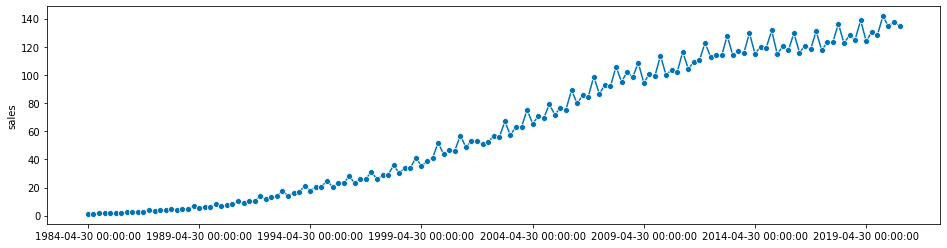

In [12]:
plot_series(y)

### 1.5 Split data (0.75 pt.)
[back to contents](#Contents)

Split the data into train and test samples:

``` temporal_train_test_split(...) ```

choose ``` test_size=0.2 ```

In [13]:
y_train, y_test = temporal_train_test_split(y, test_size=0.2)

plot train and test samples using ``` plot_series ```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='sales'>)

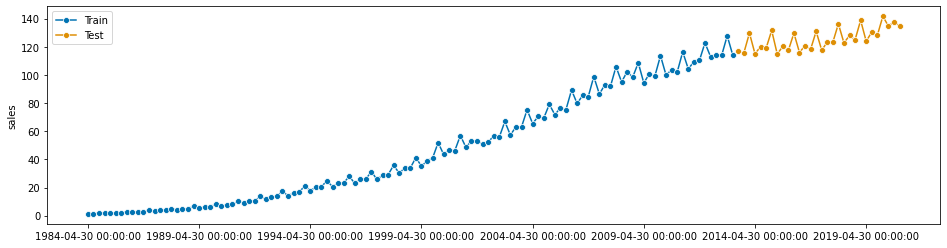

In [14]:
plot_series(y_train, y_test, labels=['Train', 'Test'])

## 2. ETS (7 pt.)

### 2.1 Estimate ETS (MAA) and (AAM) (1 pt.)
[back to contents](#Contents)

 Start with ETS (MAA). Estimate the model and name it ```model_MAA```:

```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_MAA=model_MAA.fit()```


In [15]:
model_MAA = ETSModel(y_train, error='mul', trend='add', seasonal='add', seasonal_periods=4)
fit_MAA=model_MAA.fit()

/Users/polinashishkina/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


Estimate ETS (AAM) with the same characteristics:
    
```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_AAM=model_AAM.fit()```


In [16]:
model_AAM = ETSModel(y_train, error='add', trend='add', seasonal='mul', seasonal_periods=4)
fit_AAM=model_AAM.fit()

/Users/polinashishkina/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


### 2.2 Point forecasts (1 pt.)
[back to contents](#Contents)

Obtain point forecasts for ETS(MAA) with forecasting horizon=30 quarters:

```fit_MAA.forecast(steps=...)```

In [17]:
MAA = fit_MAA.forecast(steps=30)
print(MAA)

2013-07-31    117.848870
2013-10-31    117.364671
2014-01-31    130.725436
2014-04-30    117.901780
2014-07-31    121.230476
2014-10-31    120.746277
2015-01-31    134.107043
2015-04-30    121.283386
2015-07-31    124.612083
2015-10-31    124.127884
2016-01-31    137.488649
2016-04-30    124.664993
2016-07-31    127.993690
2016-10-31    127.509490
2017-01-31    140.870256
2017-04-30    128.046600
2017-07-31    131.375296
2017-10-31    130.891097
2018-01-31    144.251863
2018-04-30    131.428206
2018-07-31    134.756903
2018-10-31    134.272704
2019-01-31    147.633469
2019-04-30    134.809813
2019-07-31    138.138509
2019-10-31    137.654310
2020-01-31    151.015076
2020-04-30    138.191419
2020-07-31    141.520116
2020-10-31    141.035917
Freq: Q-OCT, Name: simulation, dtype: float64


Obtain point forecasts for ETS(AAM) with forecasting horizon=30 quarters:

```fit_AAM.forecast(steps=...)```

In [18]:
AAM = fit_AAM.forecast(steps=30)
print(AAM)

2013-07-31    119.244377
2013-10-31    117.867026
2014-01-31    133.457304
2014-04-30    118.815286
2014-07-31    124.107213
2014-10-31    122.625183
2015-01-31    138.790994
2015-04-30    123.516825
2015-07-31    128.970049
2015-10-31    127.383340
2016-01-31    144.124684
2016-04-30    128.218364
2016-07-31    133.832885
2016-10-31    132.141496
2017-01-31    149.458374
2017-04-30    132.919903
2017-07-31    138.695721
2017-10-31    136.899653
2018-01-31    154.792064
2018-04-30    137.621442
2018-07-31    143.558557
2018-10-31    141.657810
2019-01-31    160.125754
2019-04-30    142.322982
2019-07-31    148.421392
2019-10-31    146.415967
2020-01-31    165.459444
2020-04-30    147.024521
2020-07-31    153.284228
2020-10-31    151.174124
Freq: Q-OCT, Name: simulation, dtype: float64


Plot both forecasts (AAM) and (MAA), test and train data

```plot_series()```

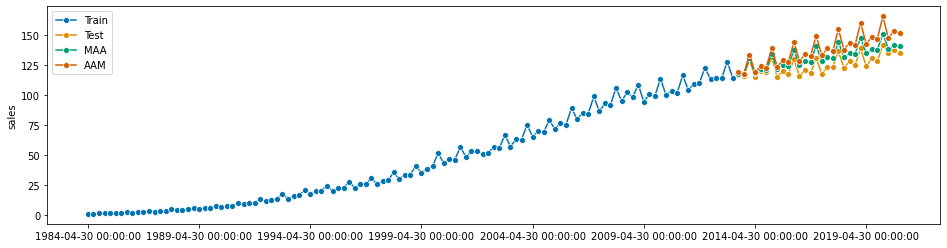

In [19]:
plot_series(y_train, y_test, MAA, AAM, labels=['Train', 'Test', 'MAA', 'AAM']);

### 2.3 Interval forecasts ETS(MAA) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

```pred_MAA=fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_MAA=pred_MAA.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```


In [27]:
pred_MAA=fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31')
pred_MAA=pred_MAA.summary_frame(alpha=0.05)
upper_int=pred_MAA['pi_upper']
lower_int=pred_MAA['pi_lower']

Plot interval predictions:

```plot_series()```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='sales'>)

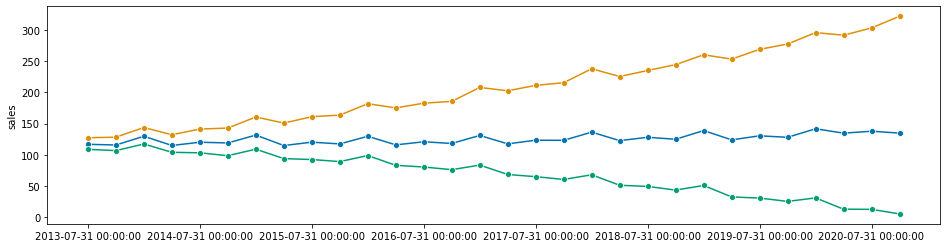

In [28]:
plot_series(y_test,upper_int,lower_int)

### 2.4 Interval forecasts ETS(AAM) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

``` pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_AAM=pred_AAM.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```

In [29]:
pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31')
pred_AAM=pred_AAM.summary_frame(alpha=0.05)
upper_int=pred_AAM['pi_upper']
lower_int=pred_AAM['pi_lower']

Plot interval predictions:

```plot_series()```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='sales'>)

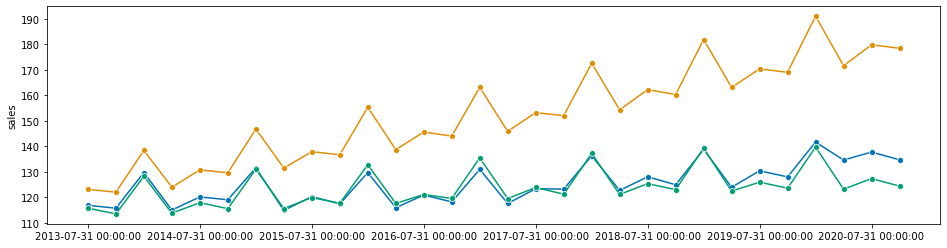

In [30]:
plot_series(y_test,upper_int,lower_int)

### 2.5 Forecast quality metrics (2 pt.)
[back to contents](#Contents)

Calculate the following metrics for both ETS(MAA) and ETS(AAM) predictions:

$MAE = \frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{n}$

```python
sklearn.metrics.mean_absolute_error
```

In [270]:
mean_absolute_error(y_test,MAA)

6.394542702158996

In [271]:
mean_absolute_error(y_test,AAM)

12.708898765471032

$MSE = \frac{\sum\limits_{i=1}^n (y_i-\hat{y}_i)^2}{n}$

```python
sklearn.metrics.mean_squared_error
```

In [272]:
mean_squared_error(y_test,MAA)

50.57141271152441

In [273]:
mean_squared_error(y_test,AAM)

195.96214763396836

$MAPE = \frac{100}{n}\frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{y_i}$ 

```python
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
```

Create a new function to calculate MAPE

In [274]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Calculate MAPE:

In [275]:
mean_absolute_percentage_error(y_test,MAA)

5.091697969378487

In [276]:
mean_absolute_percentage_error(y_test,AAM)

9.993317967703987

### 2.6 What is the best model according to the metrics above? (1 pt.)

MAA model is the best:
MAA model shows lower numbers for errors according to all three forecast quality metrics: MAE, MSE and MAPE. The metric that is most commonly used there is MSE - mean squared error - metric with higher penalty for large errors. So as we see, for MAA model MSE is 50.57141271152441, and for AAM model MSE almost 4 times higher: 195.96214763396836. MAPE is the same as MAE (which, again, is also lower and hence better for MAA) but computed as a percentage and not in units of measurement of initial series, which is more convenient for the explanation of the forecast quality. So, according to MAPE, MAA forecast is off by 5.0917% from the real values, and AAM forecast - by 9.9933%.